In [26]:
def find_turning_points(V,mu_l,mu_d):
    '''
    Input
    V : Potential Profile 
    mu_l : lead potentials
    mu_d : dot potentials
    
    Output:
    lead_info : dictionary indexed by lead no (1/2) with value [starting_point,end_point]
    dot_info : dictionary of size len(mu_d) with value [starting_point,end_point]
    
    Algorithm:
    The dots are identified by the classical turning points, mu = V(x)
    '''
    lead_info = {}
    dot_info = {}
    
    # find the turning point for the left lead
    i_left = 0
    while(V[i_left] <= mu_l[0] and i_left < len(V)):
    # in the edge case that mu_l[0] > V(x) for all x, all the landscape is only a lead
        i_left += 1
    # this loop will exit for the first i such that V[i] > mu_l[0]
    # lead1 will end at i-1
    lead_info[0] = [0,i_left-1]
    
    # find the turning point for the right lead
    i_right = len(V)-1
    while(V[i_right] <= mu_l[1] and i_right > -1):
        i_right -= 1
    # this loop exits for the first i from the right such that V[i] > mu_l[1]
    # lead2 starts at i + 1
    lead_info[1] = [i_right+1,len(V)-1]
    
    n_index_dot = 0
    i_dot = i_left
    while(n_index_dot < len(mu_d)):
        if V[i_dot] > mu_d[n_index_dot]:
            while(V[i_dot] > mu_d[n_index_dot]):
                i_dot += 1
            # now the left turning point of the dot has been found
            i_dot_start = i_dot
            while(V[i_dot] < mu_d[n_index_dot]):
                i_dot += 1
            i_dot_end = i_dot - 1
            dot_info[n_index_dot] = [i_dot_start,i_dot_end]
            n_index_dot += 1
        else:
            while(V[i_dot] < mu_d[n_index_dot]):
                i_dot += 1
            while(V[i_dot] > mu_d[n_index_dot]):
                i_dot += 1
            i_dot_start = i_dot
            while(V[i_dot] < mu_d[n_index_dot]):
                i_dot += 1
            i_dot_end = i_dot - 1
            dot_info[n_index_dot] = [i_dot_start,i_dot_end]
            n_index_dot += 1
        
    return lead_info,dot_info

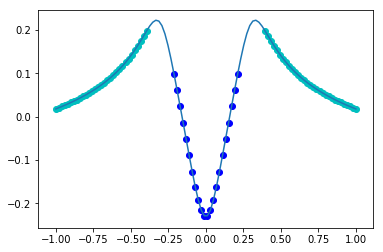

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import potential_profile
reload(potential_profile)
import classify_tf
reload(classify_tf)

N_grid = 100
x = np.linspace(-1,1,N_grid)

# dot parameters
d = (300e-3,0,0.1,1)
b1 = (-200e-3,-0.3,0.1,1)
b2 = (-200e-3,0.3,0.1,1)

V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)
plt.plot(x,V)

mu_l = (200e-3,200e-3)
mu_d = [100e-3]

lead_info,dot_info = find_turning_points(V,mu_l,mu_d)

lead1 = np.arange(lead_info[0][0],lead_info[0][1]+1)
lead2 = np.arange(lead_info[1][0],lead_info[1][1]+1)
dots = []
for i in range(len(dot_info)):
    dots += [j for j in range(dot_info[i][0],dot_info[i][1]+1)]


plt.scatter(x[lead1],V[lead1],color='c')
plt.scatter(x[lead2],V[lead2],color='c')
plt.scatter(x[dots],V[dots],color='b')



In [44]:
print lead_info
print dot_info

{0: [0, 25], 1: [74, 99]}
{0: [39, 60]}


In [33]:
%pdb

Automatic pdb calling has been turned ON


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


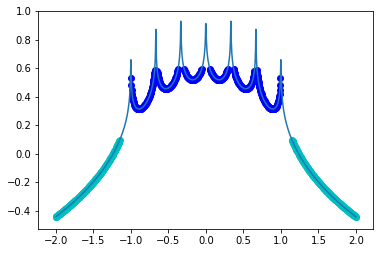

In [67]:
# testing of the new V_x_wire profile function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload

import potential_profile
reload(potential_profile)

N_grid = 1000
x = np.linspace(-2,2,N_grid)


num_features = 7
mu_vec = np.linspace(-1,1,num_features)
# control the width of the features
h = 0.001
list_b = []
for i in range(num_features):
    # range in -200e-3 to 200e-3
    V = -100e-3
    mu = mu_vec[i]
    list_b += [(V,mu,h,1)]


V = potential_profile.V_x_wire(x,list_b)

plt.plot(x,V)

mu_l = (100e-3,100e-3)
mu_d = [600e-3]*(num_features-1)
lead_info,dot_info = find_turning_points(V,mu_l,mu_d)

lead1 = np.arange(lead_info[0][0],lead_info[0][1]+1)
lead2 = np.arange(lead_info[1][0],lead_info[1][1]+1)
dots = []
for i in range(len(dot_info)):
    dots += [j for j in range(dot_info[i][0],dot_info[i][1]+1)]


plt.scatter(x[lead1],V[lead1],color='c')
plt.scatter(x[lead2],V[lead2],color='c')
plt.scatter(x[dots],V[dots],color='b')
